In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = df.drop('species',axis=1)
y = df['species']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [6]:
scaler = StandardScaler()

In [7]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [9]:
log_model = LogisticRegression()

In [10]:
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


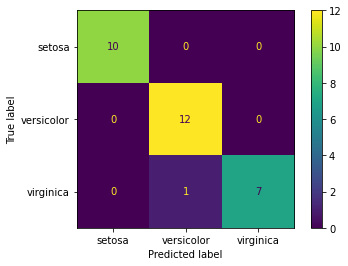

In [11]:
plot_confusion_matrix(log_model, X_test_scaled, y_test)#

In [13]:
import RPi.GPIO as GPIO
GPIO.setmode(GPIO.BOARD)
GPIO.setup(11,GPIO.OUT)
GPIO.setup(13,GPIO.OUT)
GPIO.setup(15,GPIO.OUT)
import time
import random
for k in range(20):
    a=random.randint(1,29)
    time.sleep(1)
    
    pred=log_model.predict(X_test_scaled[[a]])
    reel=y_test.reset_index()["species"][a]
    print(pred,reel)
    if pred[0]=="virginica":
        GPIO.output(11,True)
        time.sleep(1)
        GPIO.output(11,False)
    if pred[0]=="versicolor":
        GPIO.output(13,True)
        time.sleep(1)
        GPIO.output(13,False)
    if pred[0]!=reel:
        GPIO.output(15,True)
        time.sleep(1)
        GPIO.output(15,False)
        
        
        

['versicolor'] versicolor
['versicolor'] versicolor
['setosa'] setosa
['versicolor'] versicolor
['versicolor'] versicolor
['versicolor'] versicolor
['versicolor'] versicolor
['setosa'] setosa
['setosa'] setosa
['versicolor'] versicolor
['virginica'] virginica
['virginica'] virginica
['setosa'] setosa
['setosa'] setosa
['virginica'] virginica
['virginica'] virginica
['versicolor'] versicolor
['setosa'] setosa
['versicolor'] versicolor
['setosa'] setosa
